# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\David's
[nltk_data]     Surface Pro\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [112]:
# Read your api key environment variable
load_dotenv()
newsapi_key = os.getenv("NEWS_API_KEY")


In [10]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=newsapi_key)

In [11]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q='bitcoin', language='en', sort_by='relevancy')


In [12]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q='ethereum', language='en', sort_by='relevancy')

In [23]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []
for articles in bitcoin_articles["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["pos"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        sentiments.append({
            "text": text,
            'Compund': compound,
            "Positive": pos,
            "Neutral": neu,
            "Negative": neg,})
        
    except AttributeError:
        pass
        
df_btc = pd.DataFrame(sentiments)
df_btc.head()

,text,Compund,Positive,Neutral,Negative
0,El Salvador's President Nayib Bukele has made ...,0.282,0.282,0.718,0.0
1,El Salvador has become the first country in th...,0.043,0.043,0.957,0.0
2,"It's all about clean energy, it seems. \r\nElo...",0.169,0.169,0.831,0.0
3,image captionThe move means bitcoin will be ac...,0.060,0.060,0.940,0.0
4,"Several crypto fans that descended on Miami, F...",0.107,0.107,0.893,0.0


In [24]:
# Create the Ethereum sentiment scores DataFrame
sentiments = []
for articles in ethereum_articles["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["pos"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        sentiments.append({
            "text": text,
            'Compund': compound,
            "Positive": pos,
            "Neutral": neu,
            "Negative": neg,})
        
    except AttributeError:
        pass
        
df_eth = pd.DataFrame(sentiments)
df_eth.head()

,text,Compund,Positive,Neutral,Negative
0,TL;DR: The Cryptocurrency with Ethereum and So...,0.0,0.0,1.000,0.000
1,It wasn't long ago that your average person ha...,0.0,0.0,0.939,0.061
2,A representation of virtual currency Ethereum ...,0.0,0.0,1.000,0.000
3,This article was translated from our Spanish e...,0.0,0.0,0.934,0.066
4,This new mining feature is called 'Norton Cryp...,0.0,0.0,1.000,0.000


In [25]:
# Describe the Bitcoin Sentiment
df_btc.describe()

,Compund,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.00000
mean,0.074800,0.074800,0.895150,0.03000
std,0.069831,0.069831,0.064774,0.03939
min,0.000000,0.000000,0.718000,0.00000
25%,0.032250,0.032250,0.844750,0.00000
50%,0.065500,0.065500,0.910500,0.00000
75%,0.105500,0.105500,0.938500,0.06200
max,0.282000,0.282000,1.000000,0.10700


In [27]:
# Describe the Ethereum Sentiment
df_eth.describe()

,Compund,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.038650,0.038650,0.940700,0.020650
std,0.050997,0.050997,0.060369,0.040732
min,0.000000,0.000000,0.782000,0.000000
25%,0.000000,0.000000,0.924750,0.000000
50%,0.000000,0.000000,0.936500,0.000000
75%,0.070750,0.070750,1.000000,0.015250
max,0.188000,0.188000,1.000000,0.151000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

Bitcoin had a higher mean positive score
Bitcoin had the highest compund score
Bitcoin had the highest positive score---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [33]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [34]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("it'")

In [57]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    words = word_tokenize(text)
    
    # Remove the punctuation from text

    words = list(filter(lambda t: t not in punctuation, words))
   
    # Create a tokenized list of the words
    # above
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in tokens if word.lower() not in stop]
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))  
    
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words)) 
    
    return tokens

In [58]:
# Create a new tokens column for Bitcoin
df_btc['tokens'] = df_btc.text.apply(tokenizer) 
df_btc.head()

,text,Compund,Positive,Neutral,Negative,tokens
0,El Salvador's President Nayib Bukele has made ...,0.282,0.282,0.718,0.0,"[el, salvador, 's, president, nayib, bukele, h..."
1,El Salvador has become the first country in th...,0.043,0.043,0.957,0.0,"[el, salvador, ha, become, first, country, wor..."
2,"It's all about clean energy, it seems. \r\nElo...",0.169,0.169,0.831,0.0,"['s, clean, energy, seems, elon, musk, tesla, ..."
3,image captionThe move means bitcoin will be ac...,0.060,0.060,0.940,0.0,"[image, captionthe, move, mean, bitcoin, accep..."
4,"Several crypto fans that descended on Miami, F...",0.107,0.107,0.893,0.0,"[several, crypto, fan, descended, miami, flori..."


In [59]:
# Create a new tokens column for Ethereum
df_eth['tokens'] = df_eth.text.apply(tokenizer) 
df_eth.head()

,text,Compund,Positive,Neutral,Negative,tokens
0,TL;DR: The Cryptocurrency with Ethereum and So...,0.0,0.0,1.000,0.000,"[tl, dr, cryptocurrency, ethereum, solidity, b..."
1,It wasn't long ago that your average person ha...,0.0,0.0,0.939,0.061,"[wa, n't, long, ago, average, person, clue, nf..."
2,A representation of virtual currency Ethereum ...,0.0,0.0,1.000,0.000,"[representation, virtual, currency, ethereum, ..."
3,This article was translated from our Spanish e...,0.0,0.0,0.934,0.066,"[article, wa, translated, spanish, edition, us..."
4,This new mining feature is called 'Norton Cryp...,0.0,0.0,1.000,0.000,"[new, mining, feature, called, 'norton, crypto..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [60]:
from collections import Counter
from nltk import ngrams

In [79]:
# Generate the Bitcoin N-grams where N=2
N = 2
btc_grams = ngrams(tokenizer(df_btc.text.str.cat()), N)
Counter(btc_grams).most_common(10)

[(('el', 'salvador'), 7),
 (('bitcoin', 'legal'), 6),
 (('legal', 'tender'), 5),
 (('reuters', 'el'), 4),
 (('central', 'american'), 3),
 (('president', 'nayib'), 2),
 (('nayib', 'bukele'), 2),
 (('salvador', 'ha'), 2),
 (('ha', 'become'), 2),
 (('become', 'first'), 2)]

In [62]:
# Generate the Ethereum N-grams where N=2
N = 2
eth_grams = ngrams(tokenizer(df_eth.text.str.cat()), N)
Counter(eth_grams).most_common(10)

[(('cryptocurrency', 'ethereum'), 3),
 (('digital', 'yuan'), 3),
 (('ethereum', 'solidity'), 2),
 (('solidity', 'blockchain'), 2),
 (('blockchain', 'developer'), 2),
 (('developer', 'bundle'), 2),
 (('non-fungible', 'token'), 2),
 (('+2367', 'char'), 2),
 (('yao', 'qian'), 2),
 (('qian', 'former'), 2)]

In [109]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [110]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens = tokenizer(df_btc.text.str.cat())
token_count(btc_tokens, 10)

[('char', 20),
 ('bitcoin', 15),
 ('salvador', 9),
 ('cryptocurrency', 8),
 ('…', 8),
 ('el', 7),
 ("'s", 6),
 ('legal', 6),
 ('ha', 5),
 ('tender', 5)]

In [111]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens = tokenizer(df_eth.text.str.cat())
token_count(eth_tokens, 10)

[('char', 19),
 ('cryptocurrency', 10),
 ("'s", 9),
 ('ethereum', 6),
 ('…', 5),
 ('world', 5),
 ('digital', 5),
 ('blockchain', 4),
 ('nft', 4),
 ('bitcoin', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

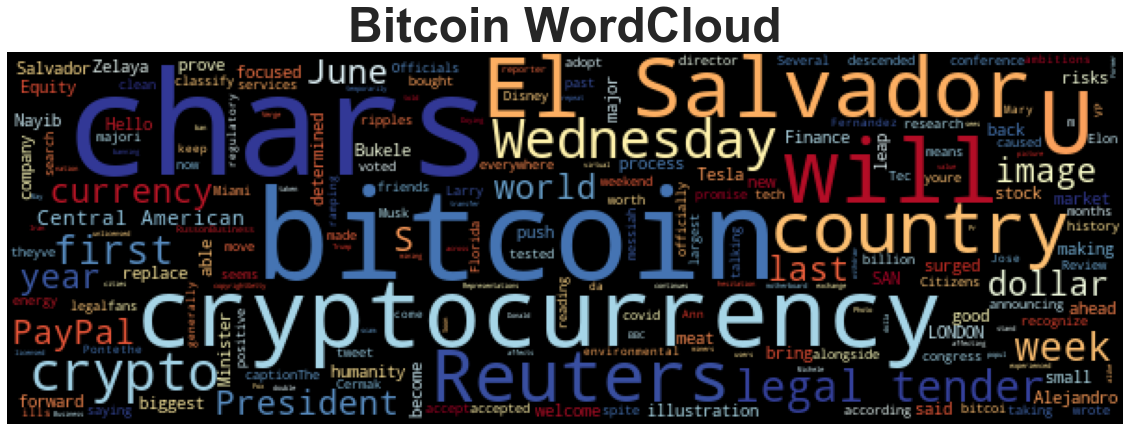

In [83]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    wdc_btc = WordCloud(width=600, colormap='RdYlBu').generate(text)
    plt.imshow(wdc_btc)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight": "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
wordcloud(df_btc.text.str.cat(), title="Bitcoin WordCloud")
    

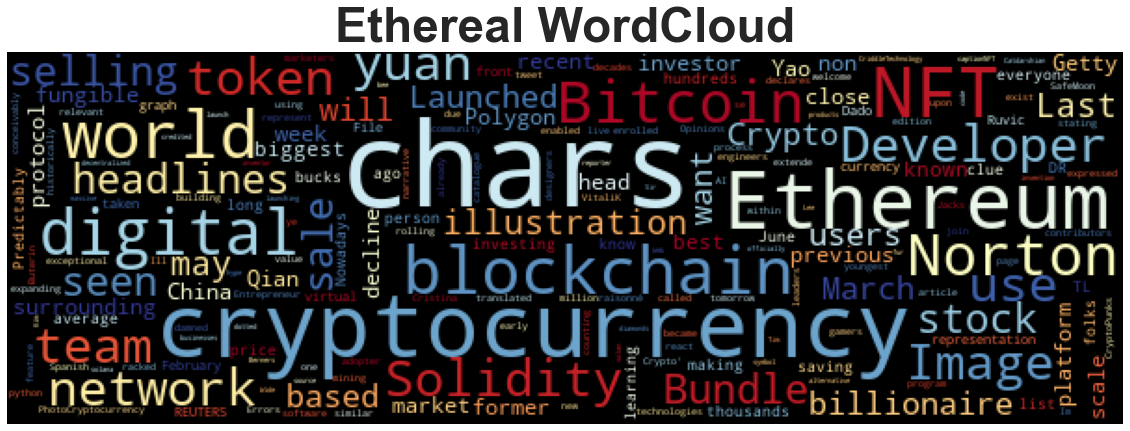

In [84]:
# Generate the Ethereum word cloud
def wordcloud(text, title=""):
    wdc_btc = WordCloud(width=600, colormap='RdYlBu').generate(text)
    plt.imshow(wdc_btc)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight": "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
wordcloud(df_eth.text.str.cat(), title="Ethereal WordCloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [74]:
import spacy
from spacy import displacy

In [75]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [77]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [85]:
# Concatenate all of the Bitcoin text together
concat_btc = df_btc.text.str.cat()
concat_btc

'El Salvador\'s President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country\'s congress voted to accept the cryptocurrency by a majori… [+1414 chars]El Salvador has become the first country in the world to recognize the cryptocurrency bitcoin as legal currency, according to President Nayib Bukele in a tweet on Wednesday. Citizens will be able to … [+3840 chars]It\'s all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars]image captionThe move means bitcoin will be accepted everywhere for goods and services, alongside the US dollar\r\nEl Salvador has become the first country in the world to officially classify Bitcoin a… [+2233 chars]Several crypto fans that descended on Miami, Florida, last weekend for the largest bitcoin conference in history are now saying theyv

In [86]:
# Run the NER processor on all of the text
proc_btc = nlp(df_btc.text.str.cat())

# Add a title to the document
proc_btc.user_data['title'] = "Bitcoin NER"

In [89]:
# Render the visualization
displacy.render(proc_btc, style='ent')

In [106]:
# List all Entities
btc_entities = [ent.text for ent in proc_btc.ents]
btc_entities

["El Salvador's",
 'Nayib Bukele',
 'Bitcoin',
 'Central American',
 'congress',
 'first',
 'Nayib Bukele',
 'Wednesday',
 'Citizens',
 'Tesla',
 'the past few months',
 'first',
 'Tesla',
 '$1.5 billion',
 'US',
 'El Salvador',
 'first',
 'Bitcoin',
 'Miami',
 'Florida',
 'last weekend',
 'covid-19',
 'Larry Cermak',
 'Review',
 'Last week',
 'Disney',
 'This week',
 'Wednesday',
 'Jose Fernandez da Pontethe',
 'Mary-Ann RussonBusiness',
 'BBC News',
 'US',
 'Donald Trump',
 'Fox Business',
 'Bitcoin',
 'US',
 'Michele Doying',
 'Iran',
 'PayPal',
 'PayPal',
 'U.S.',
 'Bitcoin',
 'June 16',
 'Reuters',
 'El Salvador',
 'U.S.',
 'Alejandro Zelaya',
 'Wednesday',
 'Central American',
 'June 23',
 'Reuters',
 'El Salvador',
 'June 23',
 'Reuters',
 'El Salvador',
 'Bitcoin',
 'May 20, 2021',
 'REUTERS/',
 'Reuters',
 'Reuters',
 'El Salvador',
 'U.S.',
 'Alejandro Zelaya',
 'Wednesday',
 'the Central American',
 'Colonial Pipeline',
 'JBS',
 'up to one quarter',
 'US',
 'Late last week',

---

### Ethereum NER

In [87]:
# Concatenate all of the Ethereum text together
concat_eth = df_eth.text.str.cat()
concat_eth

'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars]It wasn\'t long ago that your average person had no clue what an NFT was. Nowadays, they\'re making headlines for selling for hundreds of thousands of bucks. Predictably, folks are learning about NFTs … [+3056 chars]A representation of virtual currency Ethereum is seen in front of a stock graph in this illustration taken February 19, 2021. REUTERS/Dado Ruvic/Illustration/File PhotoCryptocurrency Ethereum extende… [+1099 chars]This article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.\r\nLast May, VitaliK Buterin became the youngest billionaire in the world at just 27 ye… [+2422 chars]This new mining feature is called \'Norton Crypto\' and will be rolling out tomorrow to Norton 360 users enrolled in Norton\'s early adopt

In [91]:
# Run the NER processor on all of the text
proc_eth = nlp(df_eth.text.str.cat())

# Add a title to the document
proc_eth.user_data['title'] = "Ethereum NER"

In [93]:
# Render the visualization
displacy.render(proc_eth, style='ent')

In [107]:
# List all Entities
eth_entities = [ent.text for ent in proc_eth.ents]
eth_entities

['21.25',
 'June 17',
 '97%',
 'NFT',
 'hundreds of thousands',
 'February 19, 2021',
 'REUTERS/',
 'Spanish',
 'AI',
 'Last May',
 'VitaliK Buterin',
 "Norton Crypto'",
 'tomorrow',
 'Norton',
 '360',
 'Norton',
 'Norton Crypto',
 'March 2021',
 'more than one million',
 'SafeMoon',
 'decades',
 'Ill',
 'Jacks',
 "Kim Catdarshian's",
 'March 2020',
 'Tim Berners-Lee',
 'the World Wide Web',
 'NFT',
 "Sotheby's",
 'NFT',
 'Ferdman/Getty Images\r\nBillionaire',
 'Mark Cuban',
 'Last week',
 'token',
 'NFT',
 '90 percent',
 'recent weeks',
 'Indonesia',
 'Pintu',
 'first',
 'today',
 'Qian',
 'China',
 'digital yuan',
 'central bank',
 'Sina Finance',
 'Monday',
 "yuan cashier's",
 'Costfoto/Barcroft Media',
 'Yao Qian',
 'China',
 '8.54 %',
 '36,265',
 'Wednesday',
 '2,853.31',
 'Bitcoin',
 '30.8%',
 'year',
 '27,734',
 '5.71%',
 '35,210',
 'Saturday',
 '2,131.11',
 'Bitcoin',
 '45.7%',
 '2021',
 '6',
 'The Cryptocurrency with Ethereum']

---